In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import interpolatespectra
from scipy import interpolate

## If your interpolated spectra has unneccessary additions to its calibration spectra; take note because you need to still identify these false negatives. Later, you will need to remove the false negatives from the dataset. 

### Make sure to look at peakidentify and chemical reactions to note unnecessary additions to your calibration spectra before continuing to the machine learning

In [ ]:
dataprep.new_hdf5('formic_supervised_calibration_dataset')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5','../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx',label='FormicAcid')


In [ ]:
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'propane')
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'ethane')
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'acetaldehyde')
# dataprep.add_calibration('formic_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethylene_test.xlsx', 'ethylene')

In [2]:
dataprep.view_hdf5('formic_supervised_calibration_dataset.hdf5')

**** formic_supervised_calibration_dataset.hdf5 ****
FormicAcid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


# Interpolated calibration dataset

In [3]:
# dataprep.new_hdf5('supervised_calibration_interp')

In [4]:
dataprep.view_hdf5('../ramandecompy/tests/test_files/formic_supervised_calibration_interp-Copy1.hdf5')

**** ../ramandecompy/tests/test_files/formic_supervised_calibration_interp-Copy1.hdf5 ****
interp_FormicAcid
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    100
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
| 

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    40
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    41
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    42
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    

|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    83
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    84
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    85
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    105
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    106
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    107
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    | 

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    34
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    35
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber


|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    66
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    67
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    68
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    

|    93
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    94
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    95
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    96
|    |    Peak_01
| 

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    

|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    47
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    49
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    

|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    75
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    76
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    77
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    

|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    3
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    30
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    31
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    P

|    |    wavenumber
|    59
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    6
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    60
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    res

|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    90
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    counts
|    |    residuals
|    |    wavenumber
|    91
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    92
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    93
|    |    Peak_01
|    |    Peak_0

|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    20
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    Peak_0

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    47
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    49
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    

|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    70
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
|    71
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    72
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |   

|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    95
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    96
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    counts
|    |    residuals
|    |    wavenumber
|    97
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |   

|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    24
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    

|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    46
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    counts
|    |    residuals
|    |    wavenumber
|    47
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    4

|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    counts
|    |    residuals
|    |    wavenumber
|    73
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    74
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    75
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    

In [5]:
hdf5_interpfilename = '../ramandecompy/tests/test_files/formic_supervised_calibration_interp-Copy1.hdf5'
# first a function that will return a normalized interpolated spectra
# target_compound = 'water'
# compound = 'water'
hdf5_calfilename = 'formic_supervised_calibration_dataset.hdf5'

In [6]:
# frames = interpspectra.interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count)


In [7]:
# frames

In [8]:
key_list = interpolatespectra.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_FormicAcid/0', 'interp_FormicAcid/1', 'interp_FormicAcid/10', 'interp_FormicAcid/100', 'interp_FormicAcid/101', 'interp_FormicAcid/102', 'interp_FormicAcid/103', 'interp_FormicAcid/104', 'interp_FormicAcid/105', 'interp_FormicAcid/106', 'interp_FormicAcid/107', 'interp_FormicAcid/108', 'interp_FormicAcid/109', 'interp_FormicAcid/11', 'interp_FormicAcid/12', 'interp_FormicAcid/13', 'interp_FormicAcid/14', 'interp_FormicAcid/15', 'interp_FormicAcid/16', 'interp_FormicAcid/17', 'interp_FormicAcid/18', 'interp_FormicAcid/19', 'interp_FormicAcid/2', 'interp_FormicAcid/20', 'interp_FormicAcid/21', 'interp_FormicAcid/22', 'interp_FormicAcid/23', 'interp_FormicAcid/24', 'interp_FormicAcid/25', 'interp_FormicAcid/26', 'interp_FormicAcid/27', 'interp_FormicAcid/28', 'interp_FormicAcid/29', 'interp_FormicAcid/3', 'interp_FormicAcid/30', 'interp_FormicAcid/31', 'interp_FormicAcid/32', 'interp_FormicAcid/33', 'interp_FormicAcid/34', 'interp_FormicAcid/35', 'interp_FormicAcid/36', 'interp_F

In [9]:
# df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
#       keys=None, levels=None, names=None, verify_integrity=False,
#       copy=True,sort=True)
# df

# SAVE your hdf5 file before continuing and MAKE COPIES

In [10]:
hdf5_calfilename = 'formic_supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = '../ramandecompy/tests/test_files/formic_supervised_calibration_interp-Copy1.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 20, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxid

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 100.0}
The peaks that we found for 

{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
7

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 1. 1. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 1.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 1. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire':

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1

{'FormicAcid': 100.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 50.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peak

{'FormicAcid': 100.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.

{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 125.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
The peaks t

{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire':

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 50.0}
The peaks that we found fo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.]
The peaks 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
The peaks that w

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 50.0}
The peaks th

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 1.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that w

{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
121

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are

{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks t

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon diox

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAc

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are:

{'FormicAcid': 100.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrog

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found 

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
7

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found f

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 100.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4


{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 0.0}
The peaks tha

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0

{'FormicAcid': 116.66666666666667, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 0.0}
The peaks that we found for FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
The peaks that we f

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 125.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
294

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 0.0}
The peaks tha

{'FormicAcid': 50.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}


In [11]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [12]:
cal = pd.DataFrame()

In [13]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [14]:
row = next(cal.iterrows())
row

(0, fraction            0.725009
 sigma                4.36833
 amplitude            2.04011
 fwhm                 8.73666
 height              0.168103
 auc                  2.01964
 labelencoded               6
 labels          ['hydrogen']
 center                   355
 Name: 0, dtype: object)

In [15]:
cal

,fraction,sigma,amplitude,fwhm,height,auc,labelencoded,labels,center
0,0.725009,4.36833,2.04011,8.73666,0.168103,2.01964,6,['hydrogen'],355
1,0.588427,4.44899,5.21192,8.89797,0.445897,5.19737,5,"['hydrogen', 'sapphire']",587
2,0.719347,3.91914,0.887557,7.83828,0.0817101,0.885818,6,['hydrogen'],815
3,0.891323,4.17451,0.794383,8.34902,0.0637035,0.792759,6,['hydrogen'],1035
4,0.983626,3.5951,0.428263,7.19021,0.0382136,0.42755,3,['carbon dioxide'],1280
5,0.14406,4.2938,0.55899,8.5876,0.0583109,0.558834,0,"['FormicAcid', 'carbon dioxide']",1385
6,0.0190041,41.0335,30.5151,82.067,0.347173,30.505,8,['water'],1640
7,0.175804,4.29899,9.27516,8.59797,0.955999,9.27198,4,['carbon monoxide'],2141
8,0.512558,99.9297,70.1205,199.859,0.275145,49.7516,8,['water'],3195
0,6.95631e-08,3.92401,0.821184,7.84802,0.0982988,0.821184,7,['sapphire'],379


# Experimental dataset

In [17]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    875s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
430C
|    4s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    counts
|    |    residuals
|    |    wavenumber
|    5s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|  

In [18]:
key_list = interpolatespectra.keyfinder('dataimport_ML_df-Copy1.hdf5')
len(key_list)

50

In [19]:
hdf5_calfilename = 'formic_supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 20, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
{'FormicAcid': 100.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 25.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 

{'FormicAcid': 100.0, 'carbon dioxide': 150.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
{'FormicAcid': 116.66666666666667, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
{'FormicAcid': 83.33333333333334, 'carbon dioxi

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 

{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.

{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that

In [20]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [21]:
dat = pd.DataFrame()

In [22]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [23]:
dat

fraction    sigma amplitude     fwhm   height      auc  \
300C/25s 0   2.66632e-06  9.47784   251.853  18.9557  12.4817  251.852   
         1      0.506813   4.0129   1034.01   8.0258   101.26  1028.59   
         2      0.636782  3.84759   7306.16  7.69519  708.864  7270.35   
         3   2.55231e-05  2.69962   193.734  5.39924  33.7084  193.741   
         4      0.188666  4.21062   1090.47  8.42124   114.25  1089.49   
         5   1.38778e-15  20.4979   6837.15  40.9957  156.677  6837.15   
         6   6.88713e-07  7.19462   3533.44  14.3892  230.689  3533.44   
         7             0  18.0052   1438.24  36.0103  37.5207  1438.24   
         8      0.841161  29.1589   20781.3  58.3177  243.997  20534.1   
         9             1  15.8466   15275.1  31.6932  306.831  15166.6   
         10  1.05175e-05  47.9173   35138.2  95.8346  344.448  35138.2   
         11     0.179058   26.217   25828.1   52.434  436.042  25776.7   
         12            1  3.77176   285.944  7.54351  24.1317  285.521   
         13     0.489606  3.60812   255.955  7.21624  28.0624  255.753   
         14  1.60982e-15  21.9786   3553.09  43.9572  75.9353  3553.09   
         15     0.553011  79.8096   53203.1  159.619  257.309  41554.6   
300C/35s 0      0.493198  3.84136    985.18  7.68271  101.316   980.38   
         1      0.642997  3.81059   7232.34  7.62118   706.73  7196.91   
         2   1.07692e-14  2.61594   150.018  5.23189  26.9372  150.027   
         3      0.490083  4.12695   1229.31   8.2539  117.814  1226.57   
         4      0.966028  4.26157     205.6  8.52315  15.6051  204.764   
         5   1.11022e-15  20.5743   7441.88  41.1487    169.9  7441.88   
         6   5.93652e-09  7.11561   3457.79  14.2312  228.257   3457.8   
         7             0  18.2118   1501.97  36.4236  38.7388  1501.97   
         8      0.799162  29.0338   21598.4  58.0676  259.413  21355.3   
         9             1  15.7745   16283.5  31.5491   328.58  16168.3   
         10   4.7038e-08  52.5427   37279.7  105.085  333.271  37279.7   
         11     0.177272  26.9016     26193  53.8033  431.212  26140.1   
         12     0.982646  4.00883   532.343  8.01767  42.6181  531.501   
         13  2.80814e-11  3.97073   209.439  7.94147  24.7756  209.423   
...                  ...      ...       ...      ...      ...      ...   
430C/6s  9             1  7.69256   23660.9  15.3851  979.063    23579   
         10  1.11022e-15  50.4553   24675.3  100.911  229.717  24675.3   
         11     0.738487  4.16778   1014.36  8.33557  87.1077  1012.98   
         12     0.520028  93.2303   51105.6  186.461  214.322  38134.3   
430C/7s  0      0.541635  4.39474    7253.4  8.78947  639.906  7198.61   
         1      0.292955  4.04618   570.694  8.09236  59.9954  568.957   
         2      0.619249  3.88885   7308.87   7.7777  706.593  7273.64   
         3   0.000684137  2.73452    234.62  5.46903  40.2928  234.626   
         4       0.63861  4.54011   20832.2  9.08021  1711.63    20768   
         5   4.31266e-13  7.67625   4139.49  15.3525    253.3  4139.49   
         6      0.526453  3.84262   3004.72  7.68524  304.965  3000.67   
         7      0.965685  3.62261    2844.6  7.24521  254.028  2838.81   
         8             1  19.8439   16227.4  39.6878  260.298  16076.3   
         9      0.995222  7.75562   22412.3  15.5112  921.948  22334.5   
         10    0.0305331  48.4932   22094.1  96.9864  211.904  22080.2   
         11      0.88652  4.04306   1008.46  8.08611  83.6815  1006.87   
         12     0.511043  90.3349   45211.9   180.67  196.364  34067.6   
430C/8s  0      0.462596  4.42038   7438.08  8.84075   672.53  7389.79   
         1      0.855428  3.64003   677.076  7.28006    63.28  671.659   
         2      0.550579    3.868   7051.84    7.736  704.375  7021.79   
         3   2.22045e-16  2.70972   227.851  5.41944   39.497  227.858   
         4      0.642756  4.52327   22176.1  9.04653  1825.75  22107.6   
         5   1.86242

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, MultiTaskLassoCV

In [27]:
#feature selection
inputs=['fraction','sigma','amplitude','fwhm','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [28]:
# recursive feature elimination for linear regression 
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 6
Score with 6 features: 0.320891


# LASSO Feature Selection

In [29]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import sys
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
%matplotlib inline


# L2 loss function points to many features that are independent of each other
# Fwhm is deleted because related to sigma
# Auc is deleted because related to sigma,amplitude,height.

fraction    -0.786710
sigma        0.704016
amplitude    3.742734
fwhm         0.159792
auc         -3.160670
center      -1.398093
dtype: float64
Lasso picked 6 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Feature importance using Lasso Model')

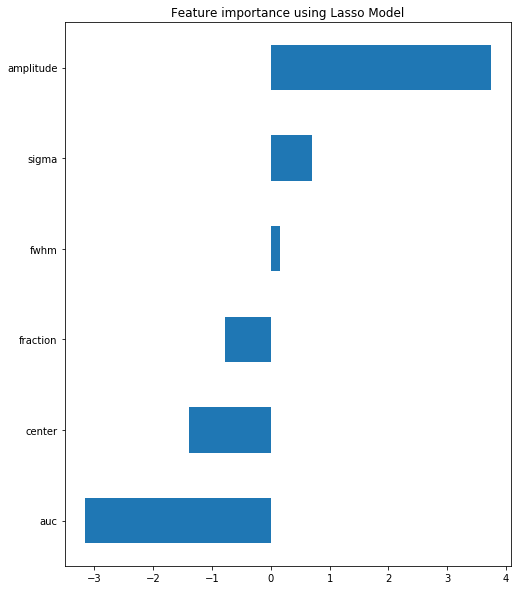

In [30]:
#LASSO 
#feature selection

# X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
# X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
# If normalized is needed
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Lasso(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# What makes sense is that center should be the only one to correlate to labels due to peakidentification
# L1 loss function points to center as the only solution

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


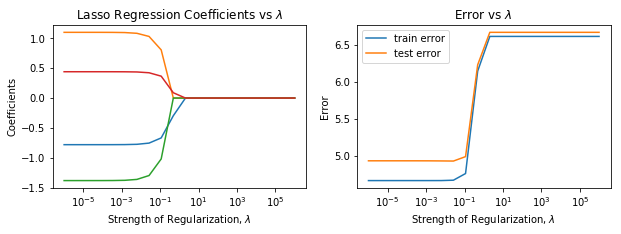

In [86]:
model=linear_model.Lasso()
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,20) # SEACH THE RANGE OF THE LAMBDA SPACE

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Error')
plt.legend(loc=0)
plt.title('Error vs $\lambda$')
plt.savefig('Lasso_feature_selectionFormic', dpi=300, bbox_inches='tight')

# Ridge Feature Selection #Didnt eliminate anything 

In [32]:
inputs=['fraction','sigma','amplitude','fwhm','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

fraction    -0.791518
sigma        0.427936
amplitude    4.014399
fwhm         0.427936
auc         -3.418263
center      -1.413182
dtype: float64
Ridge picked 6 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """


Text(0.5, 1.0, 'Feature importance using Ridge Model')

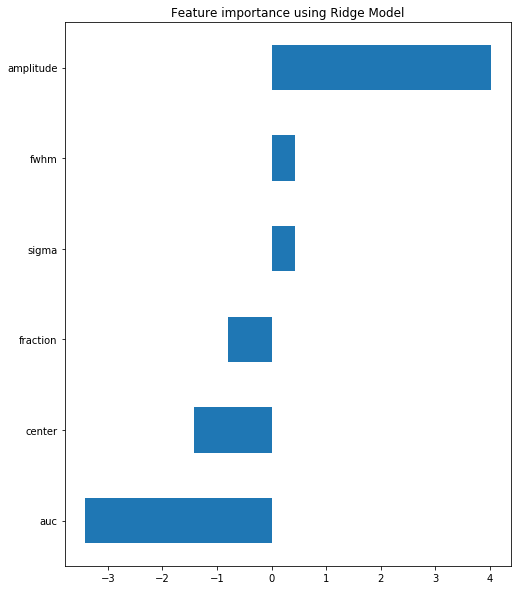

In [33]:
#Ridge
#feature selection
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Ridge(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

## 2-2 Example of searching the $\alpha$ space in RR RIDGE

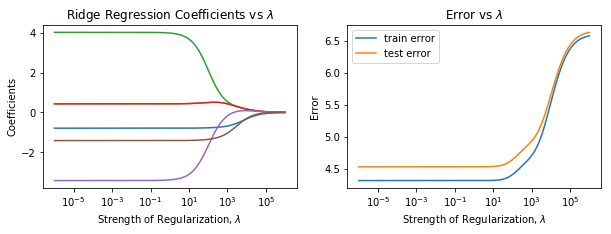

In [34]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Error')
plt.legend(loc=0)
plt.title('Error vs $\lambda$')
plt.savefig('Ridge_feature_selectionFormic', dpi=300, bbox_inches='tight')

# Neural network

In [35]:
inputs=['fraction','sigma','amplitude','fwhm','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [36]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics
import matplotlib.pyplot as plt

In [37]:
import sys
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


Training set score: 0.696677
Test set score: 0.698802


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  del sys.path[0]


(787,)
(787, 6)
Experimental Error Rate: 0.7344345616264295


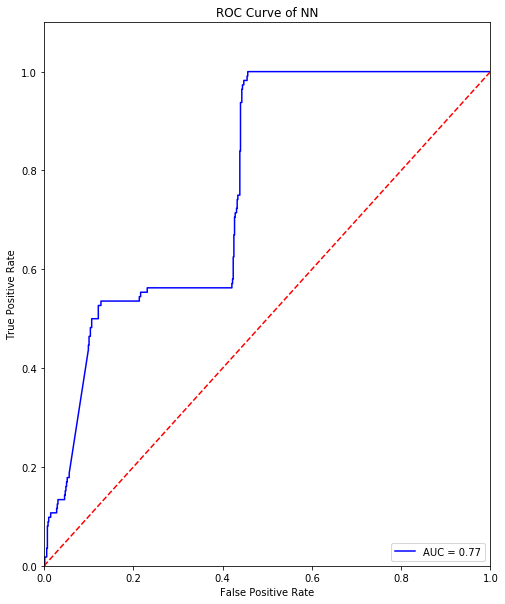

In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, batch_size=10000,verbose=0, max_iter=200, validation_fraction=0.33,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

# instantiate the model with the best known parameters
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
clf.fit(X_exp_normalized, y_exp)
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()
# Pick hyper parameters change how fast your neaural network learns
# change the conversion of the network settings and its accuracy settings 
# The epochs limit  can be changed into a conditiional function where 
# This is sayting just run  150 epochs and stop
# THe neaural network can be inputed with certain data points for each epoch
# The history object returned by the fit call contains the information in a fitting run.

Iteration 1, loss = 3.66052830
Iteration 2, loss = 2.20000886
Iteration 3, loss = 2.15465790
Iteration 4, loss = 2.13443402
Iteration 5, loss = 2.12118763
Iteration 6, loss = 2.11042638
Iteration 7, loss = 2.10142789
Iteration 8, loss = 2.09359182
Iteration 9, loss = 2.08677661
Iteration 10, loss = 2.08103066
Iteration 11, loss = 2.07576705
Iteration 12, loss = 2.07142999
Iteration 13, loss = 2.06751996
Iteration 14, loss = 2.06418373
Iteration 15, loss = 2.06100944
Iteration 16, loss = 2.05836181
Iteration 17, loss = 2.05610757
Iteration 18, loss = 2.05393524
Iteration 19, loss = 2.05207829
Iteration 20, loss = 2.05036954
Iteration 21, loss = 2.04870006
Iteration 22, loss = 2.04721208
Iteration 23, loss = 2.04598453
Iteration 24, loss = 2.04484081
Iteration 25, loss = 2.04378604
Iteration 26, loss = 2.04293441
Iteration 27, loss = 2.04209207
Iteration 28, loss = 2.04128507
Iteration 29, loss = 2.04054021
Iteration 30, loss = 2.03989842
Iteration 31, loss = 2.03938046
Iteration 32, los

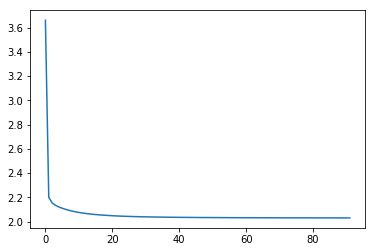

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  app.launch_new_instance()


(787,)
(787, 4)
Iteration 1, loss = 2.32669669
Iteration 2, loss = 2.31785280
Iteration 3, loss = 2.30487021
Iteration 4, loss = 2.28915253
Iteration 5, loss = 2.27176757
Iteration 6, loss = 2.25390949
Iteration 7, loss = 2.23554948
Iteration 8, loss = 2.21732718
Iteration 9, loss = 2.19991781
Iteration 10, loss = 2.18150762
Iteration 11, loss = 2.16422531
Iteration 12, loss = 2.14736889
Iteration 13, loss = 2.13104410
Iteration 14, loss = 2.11494661
Iteration 15, loss = 2.09988721
Iteration 16, loss = 2.08507216
Iteration 17, loss = 2.07083472
Iteration 18, loss = 2.05654179
Iteration 19, loss = 2.04297796
Iteration 20, loss = 2.02949149
Iteration 21, loss = 2.01659855
Iteration 22, loss = 2.00384967
Iteration 23, loss = 1.99167892
Iteration 24, loss = 1.97948489
Iteration 25, loss = 1.96761225
Iteration 26, loss = 1.95603337
Iteration 27, loss = 1.94438582
Iteration 28, loss = 1.93308386
Iteration 29, loss = 1.92206307
Iteration 30, loss = 1.91118401
Iteration 31, loss = 1.90045164
I

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


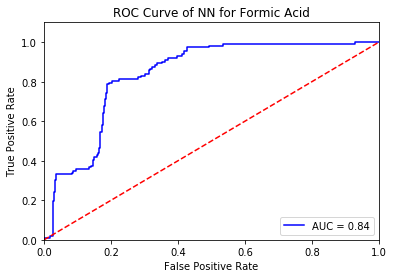

In [87]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
plt.plot(loss_values)
plt.show()
# instantiate the model with the best known parameters
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
# make a prediction for an out-of-sample observation
# print the shapes of the new y objects


from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
print(y_exp.shape)
print(X_exp_normalized.shape)


clf.fit(X_exp_normalized, y_exp)
rate = clf.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN for Formic Acid')
plt.show()

Iteration 1, loss = 1.56776798
Iteration 2, loss = 1.09861158
Iteration 3, loss = 1.00477701
Iteration 4, loss = 0.89842348
Iteration 5, loss = 0.85527219
Iteration 6, loss = 0.82765151
Iteration 7, loss = 0.80592564
Iteration 8, loss = 0.77857713
Iteration 9, loss = 0.76529201
Iteration 10, loss = 0.74409202
Training set score: 0.703895
Test set score: 0.699891


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Loss Cost')

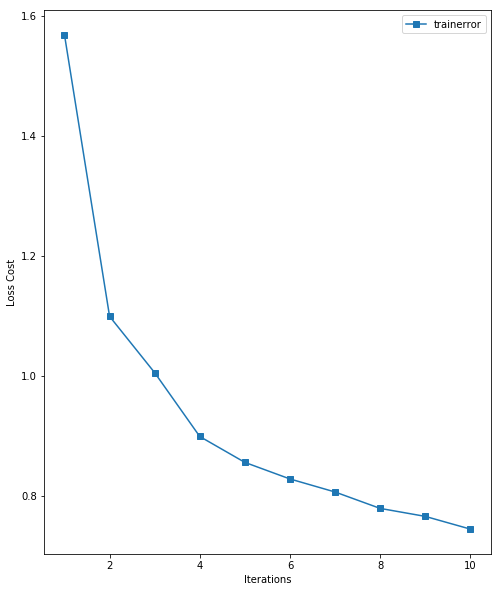

In [40]:
num = 10
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

clf.fit(X_train, y_train)

ypred = clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')



C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Training set score: 0.601335
Test set score: 0.596950


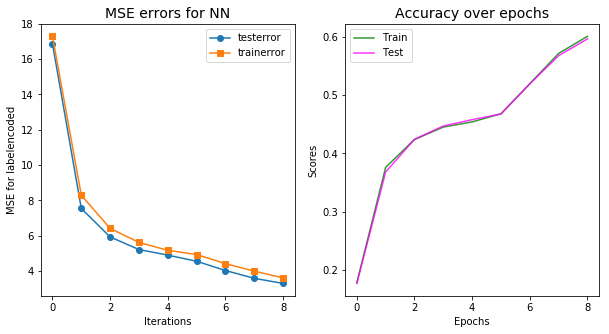

In [41]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 10
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(solver='sgd',hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train,y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.title("MSE errors for NN", fontsize=14)
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()

### Accuracy over epochs data

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.394715
Test set score: 0.386166


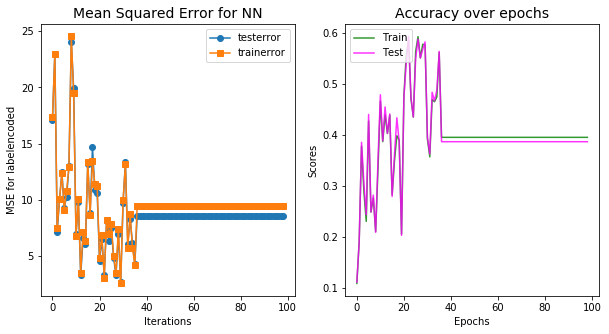

<Figure size 432x288 with 0 Axes>

In [96]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 100
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train, y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.title("Mean Squared Error for NN", fontsize=14)
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()
plt.savefig('NN_accuracyFormic', dpi=300, bbox_inches='tight')

# Cross Validation of NN

In [43]:
# Cross Validation
inputs=['fraction','sigma','center','amplitude']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1000)
# ntrain = train.shape[0]
# nval = val.shape[0]
# train = np.concatenate((train, val))

# test_fold = -1*np.ones(ntrain+nval)
# test_fold[ntrain:] = 0
# cv = PredefinedSplit(test_fold)

# # you can pass the object cv to functions such as GridSearchCV


# Kfold
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5)
X = np.array(X)
y = np.array(y)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('X_test: ', X_test)

X_test:  [[0.7250089977018592 4.368330276599167 355.0 2.040112404358464]
 [0.5884265920906828 4.448985959498219 587.0 5.211921826295028]
 [0.7193467558313854 3.919140825016611 815.0 0.8875567928751356]
 ...
 [0.7175015062438765 3.652692609262585 417.0 5.054873954199199]
 [0.7902911927649282 4.567886164648609 587.0 11.261563967078578]
 [0.7154921577358837 19.476155489823185 708.0 14.227587367301753]]
X_test:  [[0.0007523105894408633 6.947538763092436 750.0 2.313836610351504]
 [0.7210165633498569 3.9641905784660176 815.0 1.7236587487192683]
 [0.9999999999977477 9.828016848997112 1035.0 3.571868919498659]
 ...
 [1.8318679906315083e-15 20.653928327629803 1055.0 3.041267278465223]
 [0.49948810817618067 29.995409864994055 1219.0 29.68492486556438]
 [0.9999999672248652 3.651612478362379 1280.0 1.5100239977796925]]
X_test:  [[0.43342654091257704 25.585436691936586 1386.0 19.400079511753543]
 [3.977604812188673e-08 11.251444087632798 1399.0 6.691072101319449]
 [0.4605021765062084 41.78732506294

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
seed = 21899

In [45]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(max_iter=1)
# #Define a hyper-parameter space to search. (All the values that you want to try out.)

# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# # Note: the max_iter=100 that you defined on the initializer is not in the grid. So, that number will be constant, while the ones in the grid will be searched.

# # Run the search:

# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)
# # Note: the parameter n_jobs is to define how many CPU cores from your computer to use. The cv is the number of splits for cross-validation.

# # See the best results:

# # Best paramete set
# print('Best parameters found:\n', clf.best_params_)

# # All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# # Now you can use the clf to make new predictions. For example, check the performance on your test set.

# y_true, y_pred = y_test , clf.predict(X_test)

# from sklearn.metrics import classification_report
# print('Results on the test set:')
# print(classification_report(y_true, y_pred))










In [46]:
[coef.shape for coef in clf.coefs_]

[(6, 100), (100, 100), (100, 9)]

Iteration 1, loss = 2.84286386
Iteration 2, loss = 2.40960020
Iteration 3, loss = 2.41204180
Iteration 4, loss = 2.41168601
Iteration 5, loss = 2.41144549
Iteration 6, loss = 2.41115916
Iteration 7, loss = 2.41175974
Iteration 8, loss = 2.41141017
Iteration 9, loss = 2.41164173
Iteration 10, loss = 2.41228193
Training set score: 0.215443
Test set score: 0.249046
Iteration 1, loss = 2.35569491
Iteration 2, loss = 2.26997995
Iteration 3, loss = 2.18573143
Iteration 4, loss = 2.10489574

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 5, loss = 1.99224581
Iteration 6, loss = 1.86554740
Iteration 7, loss = 1.80378431
Iteration 8, loss = 1.75511994
Iteration 9, loss = 1.71136655
Iteration 10, loss = 1.66369485
(787,)
(787, 4)
Experimental Error Rate: 0.41168996188055906


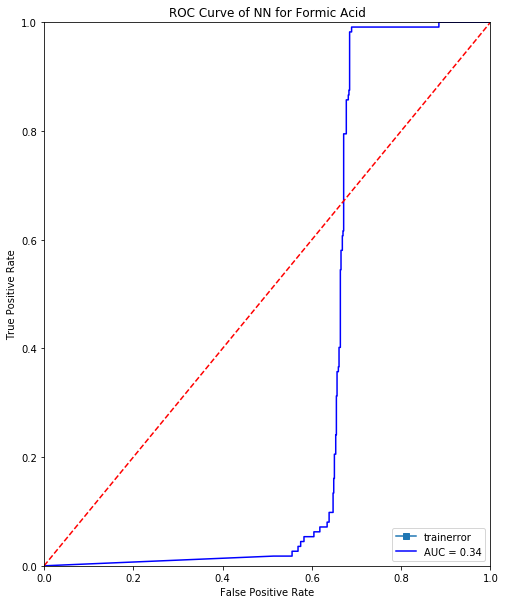

<Figure size 576x720 with 0 Axes>

In [47]:
num = 10
# instantiate the model with the best known parameters
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

clf.fit(X_train, y_train)

ypred = clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Scale and Normalize
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
clf.fit(X_exp_normalized, y_exp)
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

# make a prediction for an out-of-sample observation
ypred = clf.predict(X_exp_normalized) 
rate = clf.predict(X_exp_normalized)  == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES
y_scores = clf.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN for Formic Acid')
plt.show()
plt.savefig('NN_ROCFormic', dpi=300, bbox_inches='tight')





In [48]:
plt.show()
plt.savefig('NN_ROCFormic', dpi=300, bbox_inches='tight')

<Figure size 576x720 with 0 Axes>

# Support Vector Machines rbf

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [50]:
inputs=['fraction','sigma','center','amplitude']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [51]:
X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
#Support Vector Machine 
#-->Chosen under the assumption that eventually more batteries will be added with highly dimensional features that 
# can not be seperated by simple linear or logistic regression models 

In [52]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid',gamma ='scale')
svclassifier.fit(X_train, y_train) 
trainpred=svclassifier.predict(X_train_scaled ) #predict train data 
testpred=svclassifier.predict(X_test_scaled )
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))
print("Training set score: %f" % svclassifier.score(X_train, y_train))
print("Test set score: %f" % svclassifier.score(X_test, y_test))
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train error 13.224598202124762
Test error 13.405773420479303
Training set score: 0.384092
Test set score: 0.410131
[[184   0   0   0   0   0   0   0   0]
 [  0   0   0   0  30   0   0   0   0]
 [  0   0 341   0   0   0   0  85   0]
 [112   0   0   0   0   0   0   0   0]
 [  0   0 111   0   0   0   0   0   0]
 [  0   0   0   0   0   0 140   0   0]
 [  0   0   0   0  94   0   0 120  98]
 [  0   0   0   0   0   0   0 228  89]
 [  0   0  80   0   0   0   0 124   0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       184
           1       0.00      0.00      0.00        30
           2       0.64      0.80      0.71       426
           3       0.00      0.00      0.00       112
           4       0.00      0.00      0.00       111
           5       0.00      0.00      0.00       140
           6       0.00      0.00      0.00       312
           7       0.41      0.72      0.52       317
           8       0.00      0.00      0.00   

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# from sklearn import metrics
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# svclassifier = SVC(kernel='rbf',gamma ='scale')
# scaler = StandardScaler().fit(X_exp)
# X_exp_scaled  = preprocessing.normalize(X_exp, norm='l2', axis=0, copy=True, return_norm=False)
# svclassifier.fit(X_exp_scaled,y_exp)
# y_scores = svclassifier.predict_proba(X_exp_scaled)
# fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
# metrics.auc(fpr, tpr)
# roc_auc = auc(fpr, tpr)

# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.title('ROC Curve of kNN')
# plt.show()

# KNN

In [53]:
inputs=['fraction','sigma','center','amplitude']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [54]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
# this is a new library you haven't seen before, what do you think it does? 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [55]:
KNNmodel = KNeighborsClassifier(n_neighbors=3) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [56]:
KNNmodel.fit(X_train, y_train) # feed the model some training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [57]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.9998637973304276
Testing Error Rate: 1.0


In [58]:
k_range = range(1,20)
# empty list to store scores
k_scores = []
trainerror = []
testerror = []
train_rmse_val = []
test_rmse_val = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    KNNmodel = KNeighborsClassifier(n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    trainerror.append(mean_squared_error(y_train,KNNmodel.predict(X_train)))
    testerror.append(mean_squared_error(y_test,KNNmodel.predict(X_test)))
    train_rmse_val.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train)))) #store rmse values
#     print('Train RMSE value for k= ' , k , 'is:', trainerror)
    test_rmse_val.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train)))) #store rmse values
#     print('Test RMSE value for k= ' , k , 'is:', testerror)
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 8}

Text(0, 0.5, 'MSE for $labelencoded$')

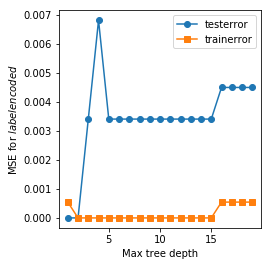

In [59]:
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(k_range,trainerror,marker='o',label='testerror')
plt.plot(k_range,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')

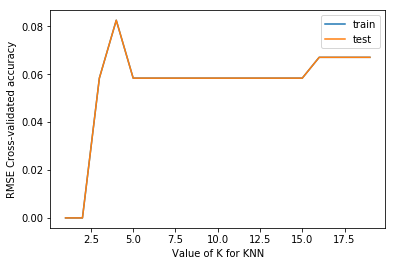

In [60]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, train_rmse_val,label='train')
plt.plot(k_range, test_rmse_val,label='test')
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE Cross-validated accuracy')
plt.legend()

In [61]:
# instantiate the model with the best known parameters
KNNmodel = KNeighborsClassifier(n_neighbors=2)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
KNNmodel.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = KNNmodel.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

(787,)
(787, 4)
Experimental Error Rate: 0.9834815756035579


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm

In [63]:
# inputs=['fraction','sigma','amplitude','height','center']
# X_train = cal[inputs]
# y_train = cal['labelencoded']
# X_test = dat[inputs]
# y_test = dat['labelencoded']

# KNN CROSS VALIDATION FROM https://www.ritchieng.com/machine-learning-cross-validation/ and lectures 

In [64]:
inputs=['fraction','sigma','center','amplitude']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']
np.random.seed(222)

# 60 -20 -20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1000)
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy')
print(scores)

[1.         1.         1.         1.         1.         1.
 0.99453552 1.         1.         1.        ]


In [65]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.9994535519125683


In [66]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 50)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

[0.9988948926946911, 0.9988948926946911, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9994535519125683, 0.9881189754837102]


{'n_neighbors': 6}

In [67]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 49
Max of list 0.9994535519125683


Text(0, 0.5, 'Cross-validated accuracy')

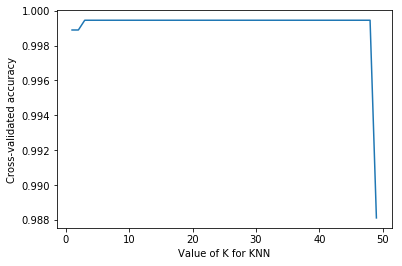

In [68]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [69]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X_val, y_val, cv=10, scoring='accuracy').mean())

0.9988948926946911


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


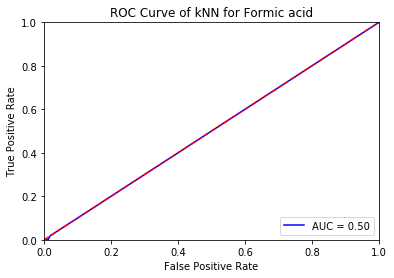

<Figure size 432x288 with 0 Axes>

In [70]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors=2)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
knn.fit(X_exp_normalized,y_exp)
y_scores = knn.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN for Formic acid')
plt.show()
plt.savefig('KNN_ROC for Formic Acid', dpi=300, bbox_inches='tight')

In [71]:
plt.show()
plt.savefig('KNN_ROC for Formic Acid', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

# Decision Trees # specifically to see if below descriptors can find and predict Area under curve # Strings needed to be 

In [72]:
inputs=['fraction','sigma','center','amplitude']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['labelencoded']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [73]:
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [74]:
DT=tree.DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

In [76]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)

In [77]:
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=inputs)
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("basic_tree.pdf") 

In [78]:
os.environ["PATH"] += os.pathsep + 'C:/Users/koolk/Anaconda3/Library/bin/graphviz/'

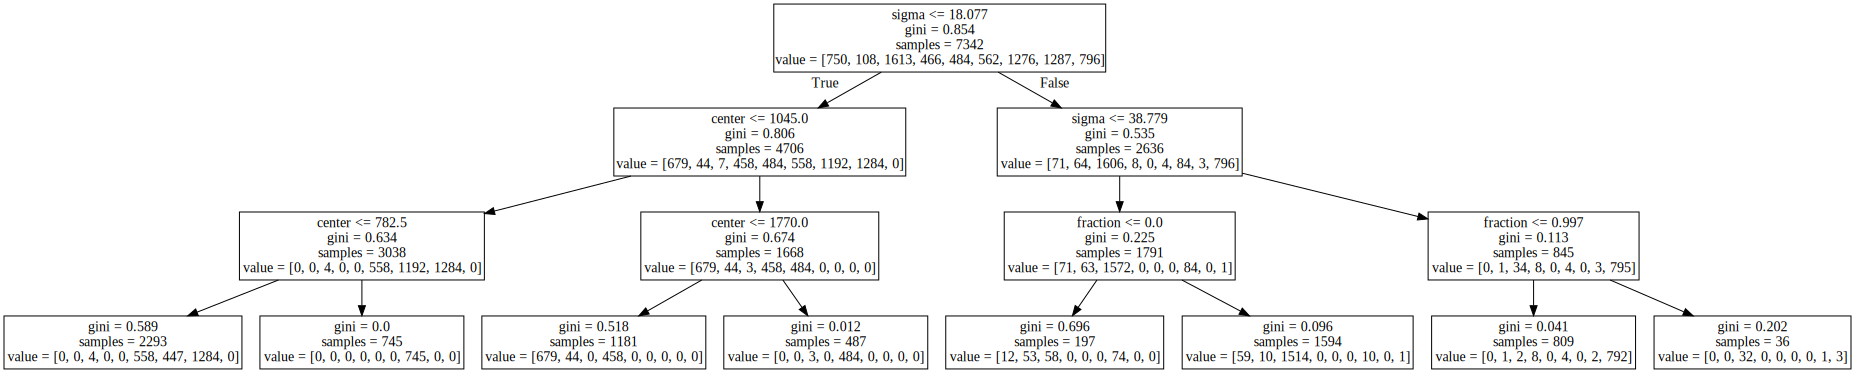

In [79]:
from IPython.display import SVG, display
display(SVG(graph.create_svg()))

In [80]:
model.fit(X_train,y_train)
rate = DT.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = DT.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.7632797602833016
Testing Error Rate: 0.7532679738562091


8
Train error 1.4404794333968947
Test error 1.4678649237472767


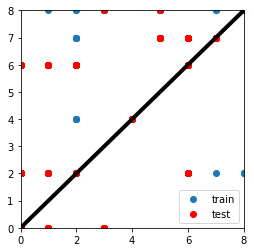

In [81]:
# make predictions on test and train set 
trainpred=DT.predict(X_train)
testpred=DT.predict(X_test)


maxlimit =testpred.max()
print(maxlimit)
#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label ='train')
plt.scatter(y_test,testpred,color='r', label = 'test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
#calculate the test and train error
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))

In [89]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeClassifier(max_depth=t)
    model.fit(X_train,y_train)
    trainerror.append(mean_squared_error(y_train,model.predict(X_train)))
    testerror.append(mean_squared_error(y_test,model.predict(X_test)))

ValueError: x and y must have same first dimension, but have shapes (19,) and (99,)

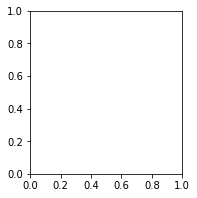

In [97]:
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')
plt.title('Mean Squared Error of DT')
plt.subplot(122)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.ylim((0,1))
plt.xlim((1,12))
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')
plt.title('Mean Squared Error of DT Zoomed')
plt.savefig('DT_MSE', dpi=300, bbox_inches='tight')

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'max_depth':[2,3,4,5,6,7,8,9]}

DTC = tree.DecisionTreeClassifier()

model = GridSearchCV(DTC, params, cv=4)
model.fit(X_train,y_train)
model.best_params_

{'max_depth': 8}

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


(787,)
(787, 4)
Experimental Error Rate: 0.9987293519695044


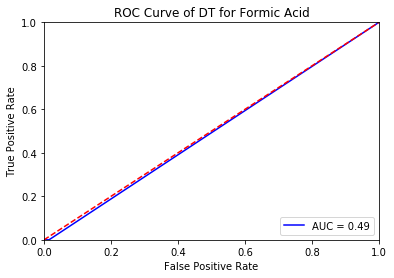

<Figure size 432x288 with 0 Axes>

In [85]:
# instantiate the model with the best known parameters
DT=tree.DecisionTreeClassifier(max_depth=9)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
DT.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = DT.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
DT=tree.DecisionTreeClassifier(max_depth=9)
DT.fit(X_exp_normalized, y_exp)
y_scores = DT.predict_proba(X_exp_normalized)
fpr, tpr, thresholds = metrics.roc_curve(y_exp, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT for Formic Acid')
plt.show()
plt.savefig('DT_ROC for Formic Acid', dpi=300, bbox_inches='tight')